### Random Forest Prediction Model
This notebook breaks down the myers briggs personality types into its 4 subcategories. Each of the subcategories is broken down into its own RF predictive model.

In [2]:
import pandas as pd
from rf import random_forest
import warnings
warnings.filterwarnings('ignore')

import os
import sys
dir = os.getcwd()
data_path = os.path.sep.join(dir.split(os.path.sep)[:-1])

Using TensorFlow backend.


In [3]:
mbti = pd.read_csv(data_path + '/mbti_updated.csv', index_col=0)

x = mbti[['words_per_comment', 'var_word_cnts', 'question_marks', 'exclam_marks', 'ellipses_cnt',
       'links_cnt', 'afinn_avg', 'noun_avg', 'verb_avg',
       'polarity_avg', 'subj_avg']]

### Introvert vs Extrovert

In [3]:
I_E = mbti['I_E']

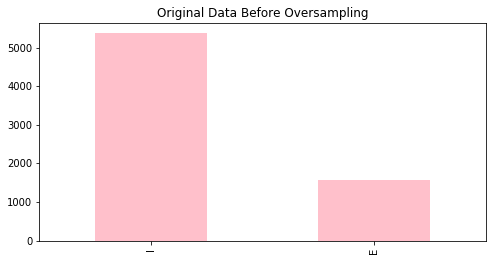

In [5]:
rf = random_forest(x,I_E)
rf.train_test_split()

In [6]:
rf.grid_search('I', False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [7]:
rf.predict()
rf.scores()

              precision    recall  f1-score   support

           0       0.41      0.06      0.11       428
           1       0.76      0.97      0.85      1307

    accuracy                           0.75      1735
   macro avg       0.59      0.52      0.48      1735
weighted avg       0.67      0.75      0.67      1735



### Intuitive vs Sensing
oversample? note for later

In [4]:
N_S = mbti['N_S']

length of oversampled data is  11938
Number of N in oversampled data 5969
Number of S 5969
Proportion of N data in oversampled data is  0.5
Proportion of S data in oversampled data is  0.5


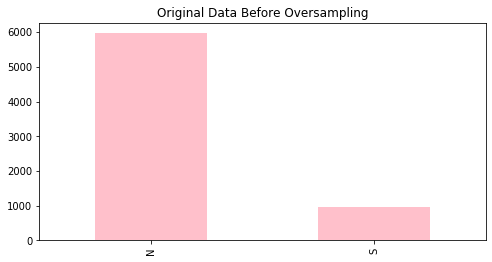

In [5]:
rf = random_forest(x, N_S)
rf.train_test_split()
rf.oversample('N','S')

In [6]:
rf.grid_search('N', False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [8]:
rf.predict()
rf.scores()

              precision    recall  f1-score   support

           0       0.15      0.06      0.08       226
           1       0.87      0.95      0.91      1509

    accuracy                           0.84      1735
   macro avg       0.51      0.50      0.50      1735
weighted avg       0.78      0.84      0.80      1735



### Feeling vs Thinking 
F = 1, T = 0


In [3]:
F_T = mbti['F_T']

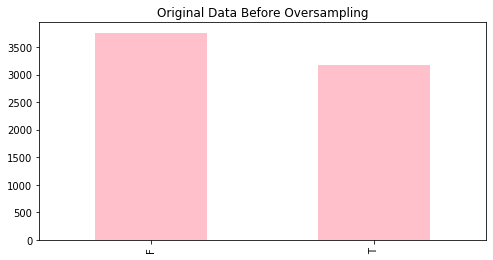

In [4]:
rf = random_forest(x, F_T)
rf.train_test_split()

In [5]:
rf.grid_search('F', False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [6]:
rf.predict()
rf.scores()

              precision    recall  f1-score   support

           0       0.61      0.61      0.61       801
           1       0.67      0.67      0.67       934

    accuracy                           0.64      1735
   macro avg       0.64      0.64      0.64      1735
weighted avg       0.64      0.64      0.64      1735



### Judging vs Perceiving

In [7]:
J_P = mbti['J_P']

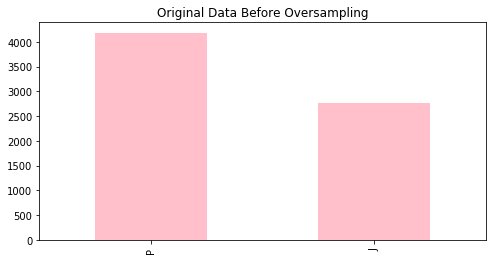

In [8]:
rf = random_forest(x, J_P)
rf.train_test_split()

In [9]:
rf.grid_search('J', False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [10]:
rf.predict()
rf.scores()

              precision    recall  f1-score   support

           0       0.61      0.62      0.61      1058
           1       0.38      0.37      0.38       677

    accuracy                           0.52      1735
   macro avg       0.50      0.50      0.49      1735
weighted avg       0.52      0.52      0.52      1735



### Results - Random Forest

|Scoring| E vs I | I vs S | F vs T | J vs P  | Total       
|---|---|---|---|---|---|
|Accuracy|0.75 | 0.84 | 0.64 | 0.52 | 0.209
|Weighted F1|0.67 | 0.80 | 0.64 | 0.52 | 0.178